In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import r2_score

%matplotlib inline

In [3]:
data = pd.read_csv('CO2_Emissions_Canada.csv')
data.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
print('Fuel Types    : ', data['Fuel Type'].unique())
print('Cylinders     : ', data['Cylinders'].unique())
print('Vehicle Class : ', data['Vehicle Class'].unique())
print('Transmission  : ', data['Transmission'].unique())

Fuel Types    :  ['Z' 'D' 'X' 'E' 'N']
Cylinders     :  [ 4  6 12  8 10  3  5 16]
Vehicle Class :  ['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']
Transmission  :  ['AS5' 'M6' 'AV7' 'AS6' 'AM6' 'A6' 'AM7' 'AV8' 'AS8' 'A7' 'A8' 'M7' 'A4'
 'M5' 'AV' 'A5' 'AS7' 'A9' 'AS9' 'AV6' 'AS4' 'AM5' 'AM8' 'AM9' 'AS10'
 'A10' 'AV10']


In [6]:
# Check for duplicate values
data.duplicated().sum()

1103

In [7]:
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

In [8]:
# Check for missing values
data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

---
---

<AxesSubplot:xlabel='Engine Size(L)', ylabel='CO2 Emissions(g/km)'>

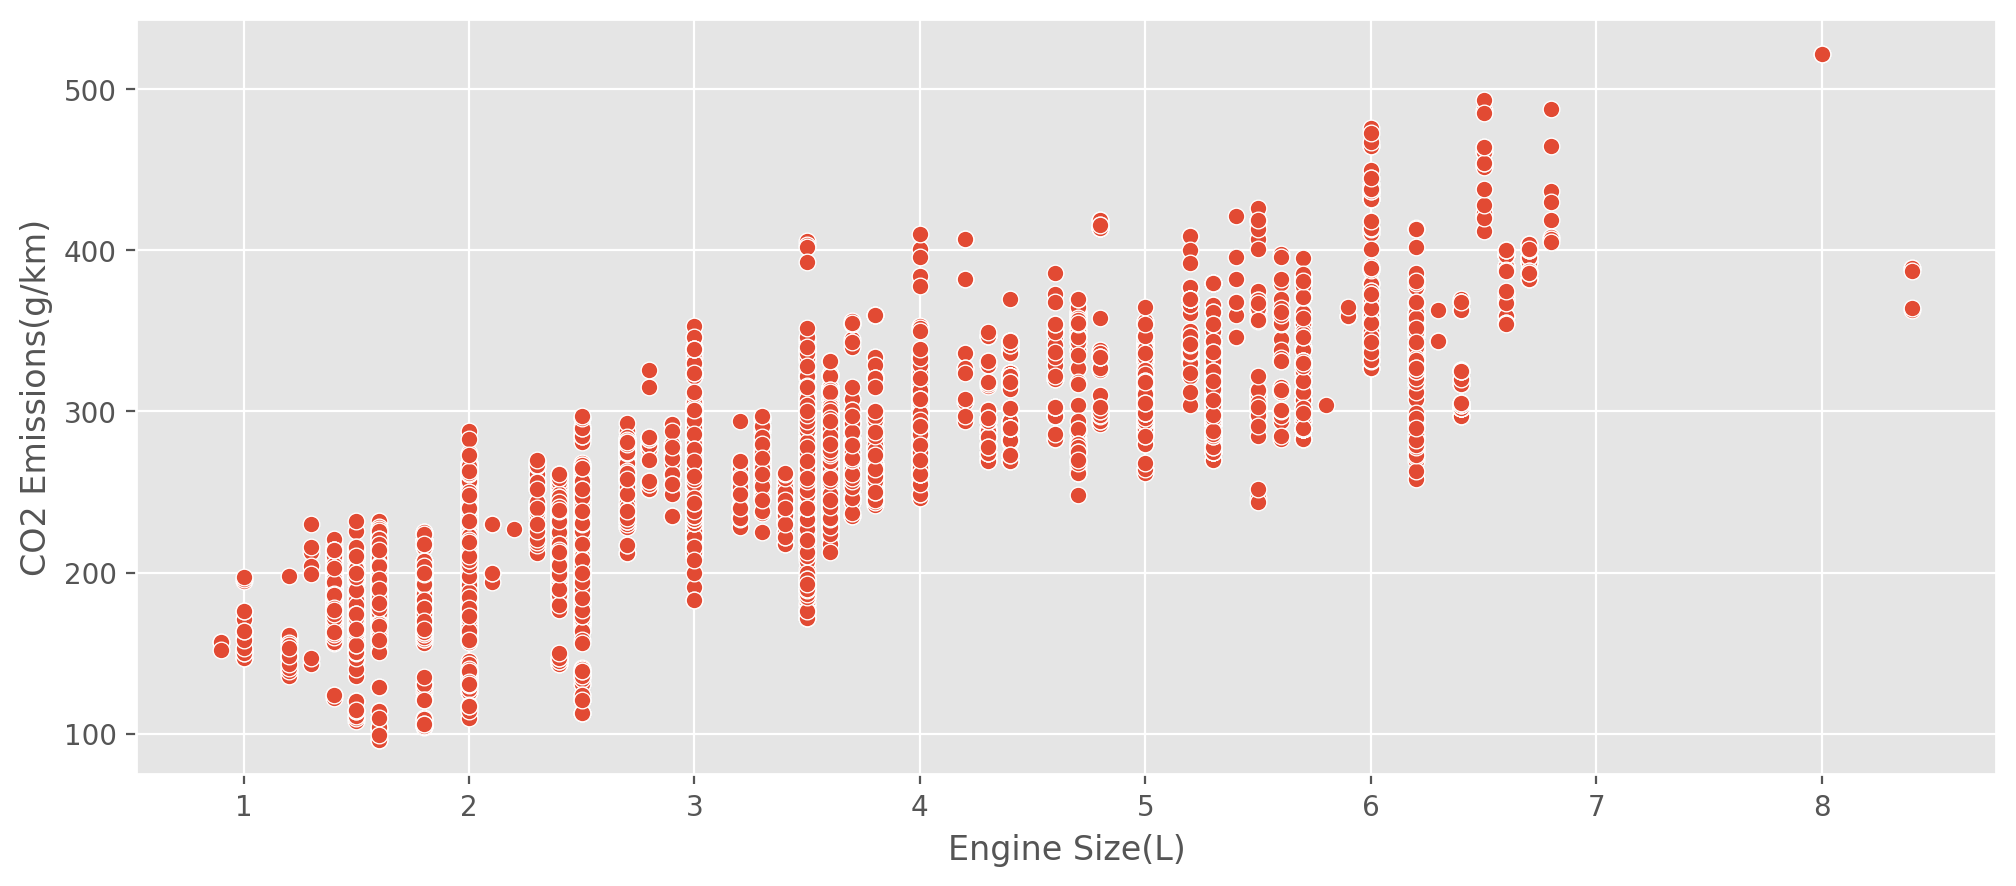

In [9]:
# Engine size and carbon emission
plt.figure(figsize = (12,5), dpi = 200)
sns.scatterplot('Engine Size(L)', 'CO2 Emissions(g/km)', data = data)

<AxesSubplot:xlabel='Fuel Consumption Comb (L/100 km)', ylabel='CO2 Emissions(g/km)'>

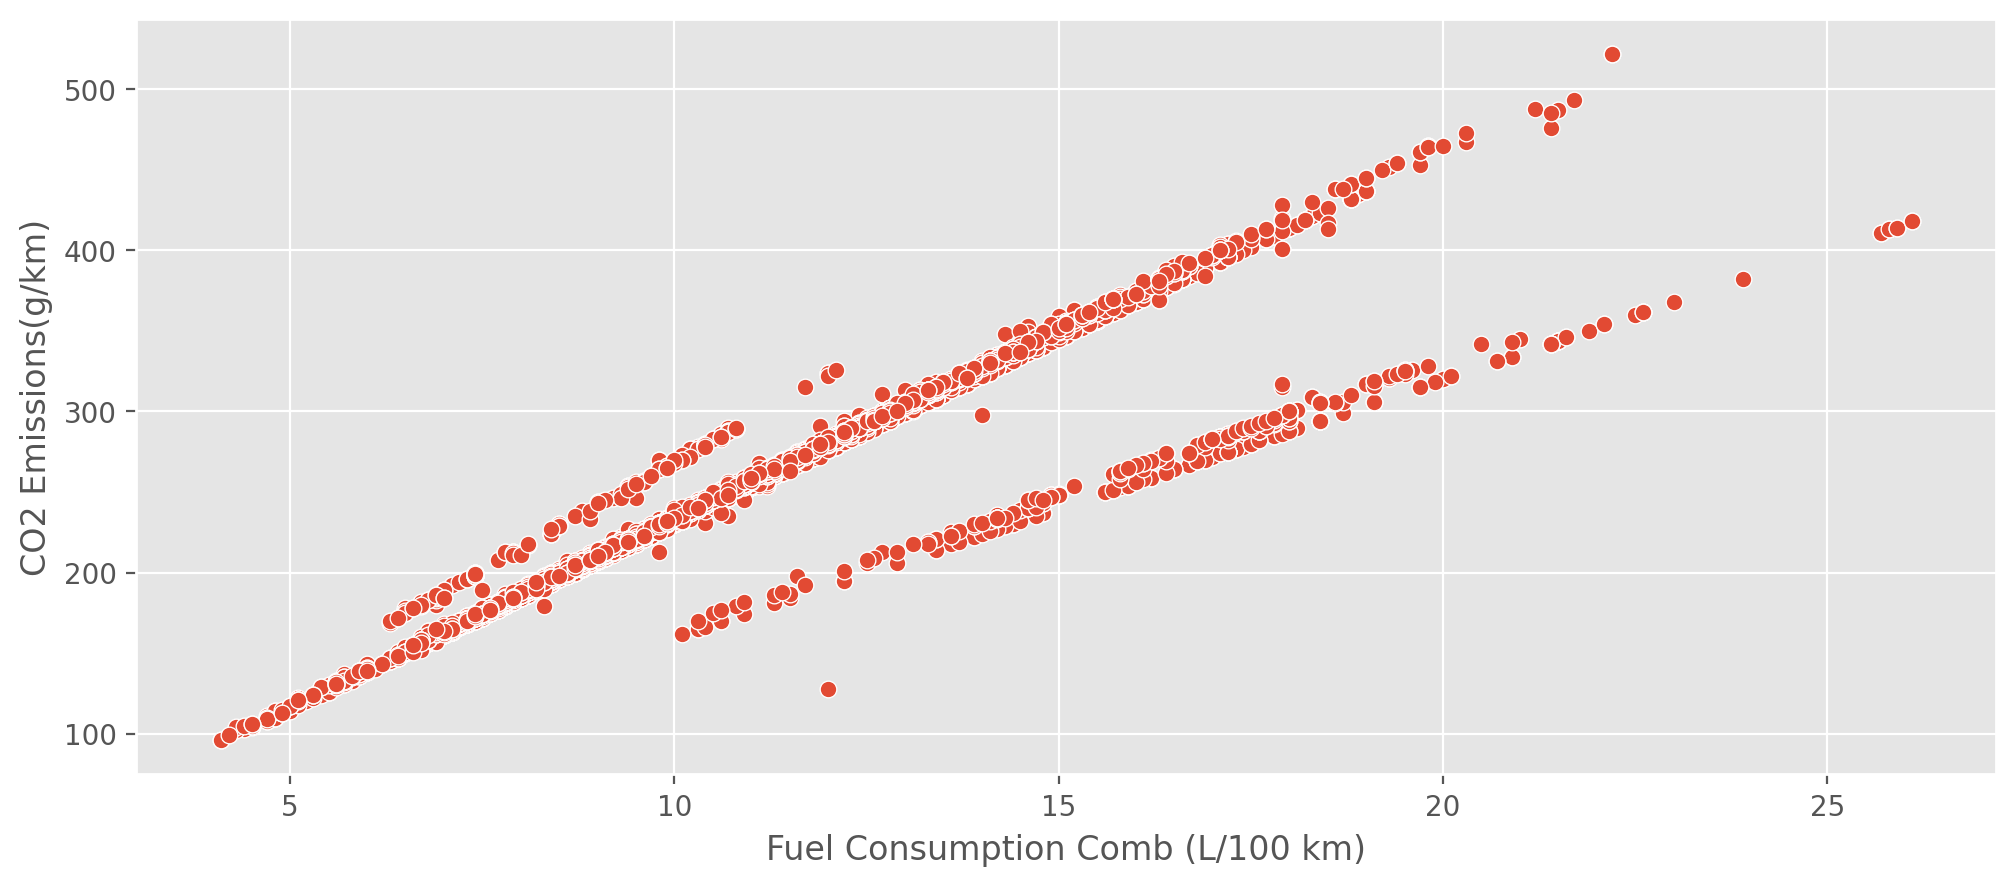

In [10]:
# Fuel Consumption and carbon emission
plt.figure(figsize = (12,5), dpi = 200)
sns.scatterplot('Fuel Consumption Comb (L/100 km)' , 'CO2 Emissions(g/km)', data = data)

<AxesSubplot:xlabel='Cylinders', ylabel='CO2 Emissions(g/km)'>

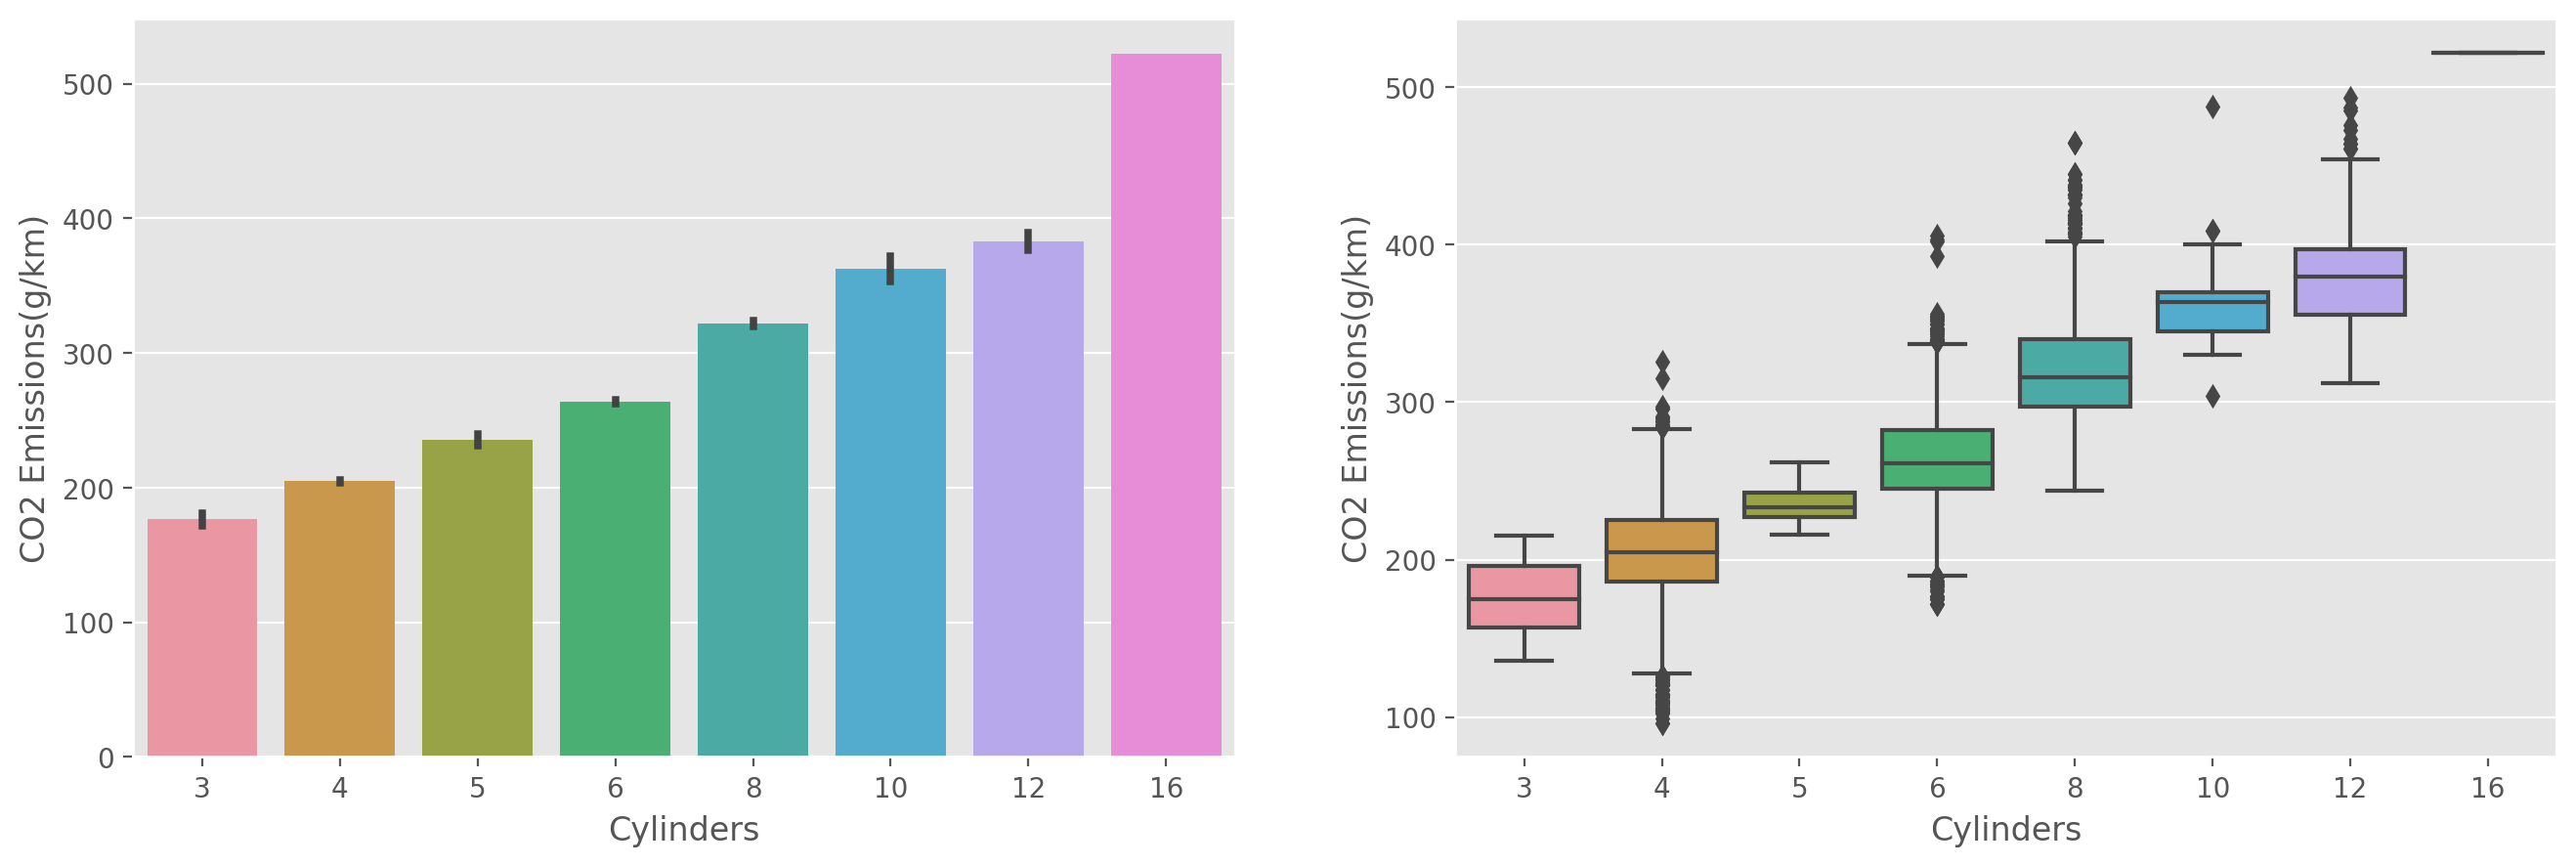

In [11]:
# Cylinders and emission
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.barplot('Cylinders', 'CO2 Emissions(g/km)', data = data)
plt.subplot(1,2,2)
sns.boxplot('Cylinders', 'CO2 Emissions(g/km)', data = data)

<AxesSubplot:xlabel='Fuel Type', ylabel='CO2 Emissions(g/km)'>

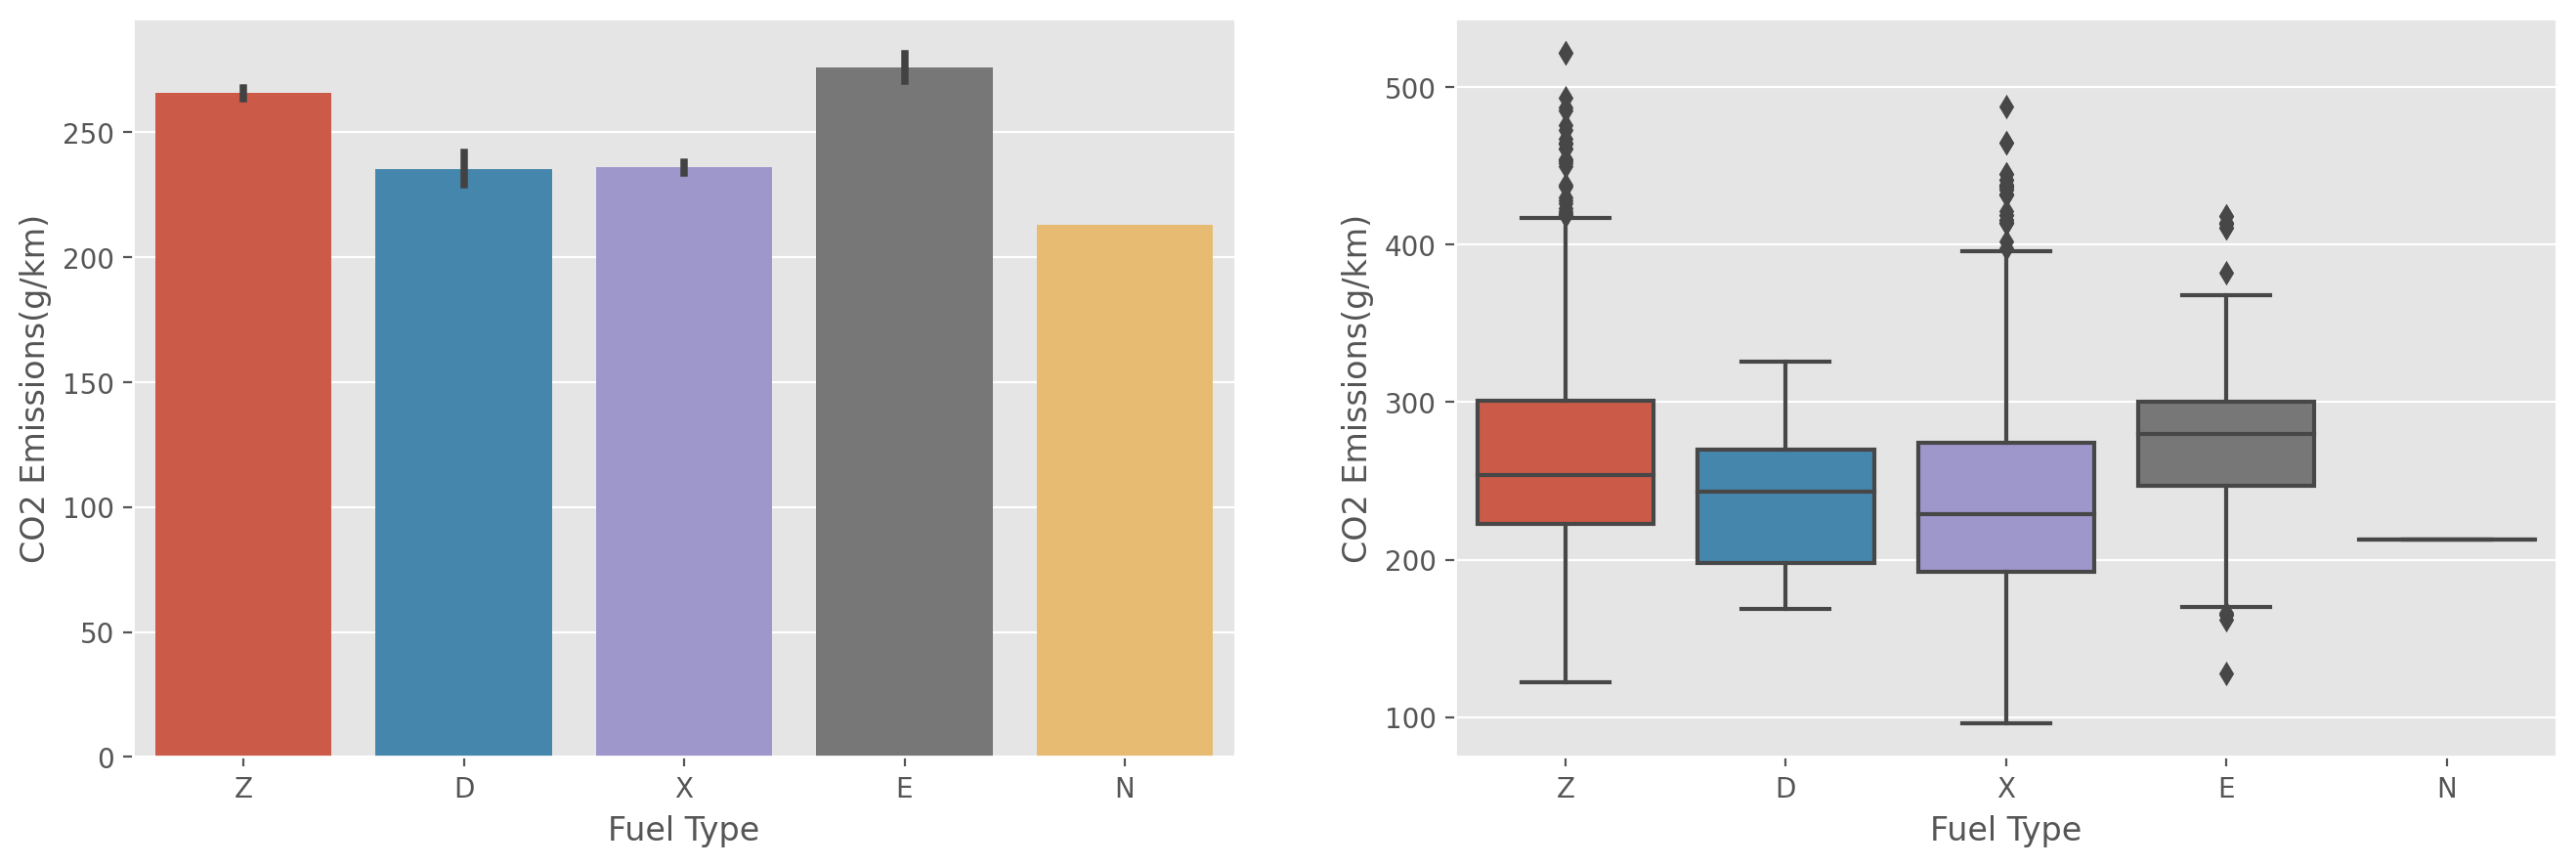

In [12]:
# Fuel type and emission
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.barplot('Fuel Type', 'CO2 Emissions(g/km)', data = data)
plt.subplot(1,2,2)
sns.boxplot('Fuel Type', 'CO2 Emissions(g/km)', data = data)

In [13]:
data.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean()

Fuel Type
D    235.238095
E    276.048485
N    213.000000
X    235.977953
Z    265.731284
Name: CO2 Emissions(g/km), dtype: float64

<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Transmission'>

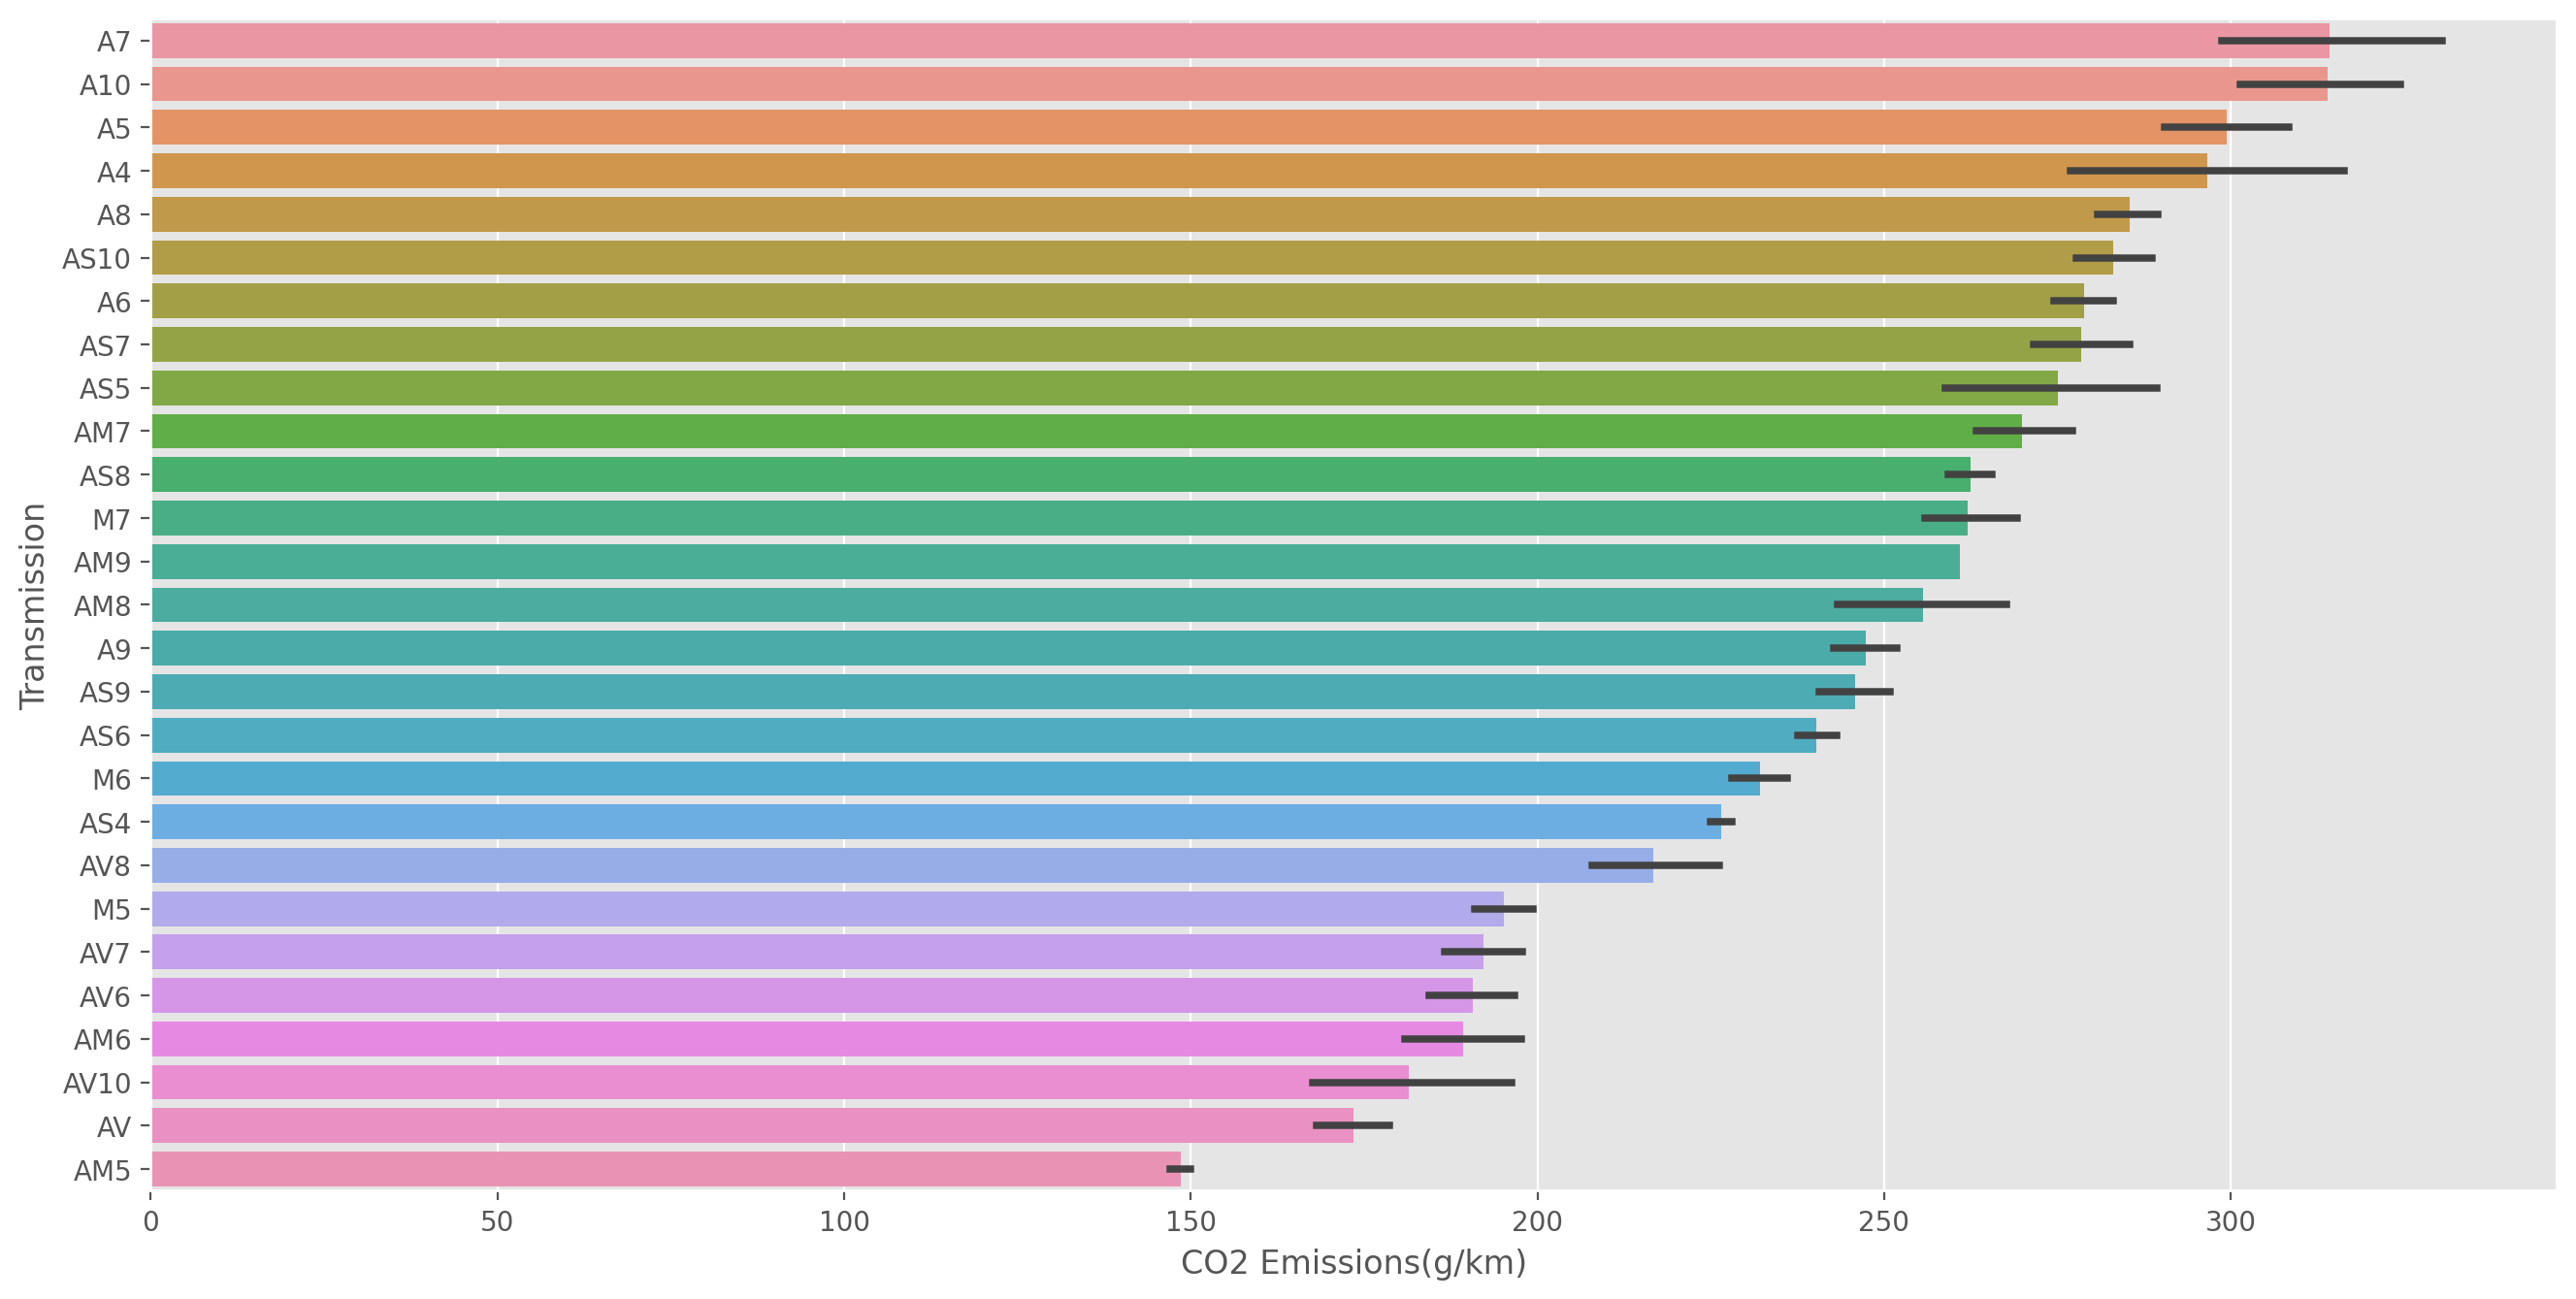

In [14]:
# Transmission and emission
desc_order = data.groupby('Transmission')['CO2 Emissions(g/km)'].mean().sort_values(ascending = False).index
plt.figure(figsize = (16,8), dpi = 200)
sns.barplot('CO2 Emissions(g/km)', 'Transmission',  data = data, order = desc_order)

<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Vehicle Class'>

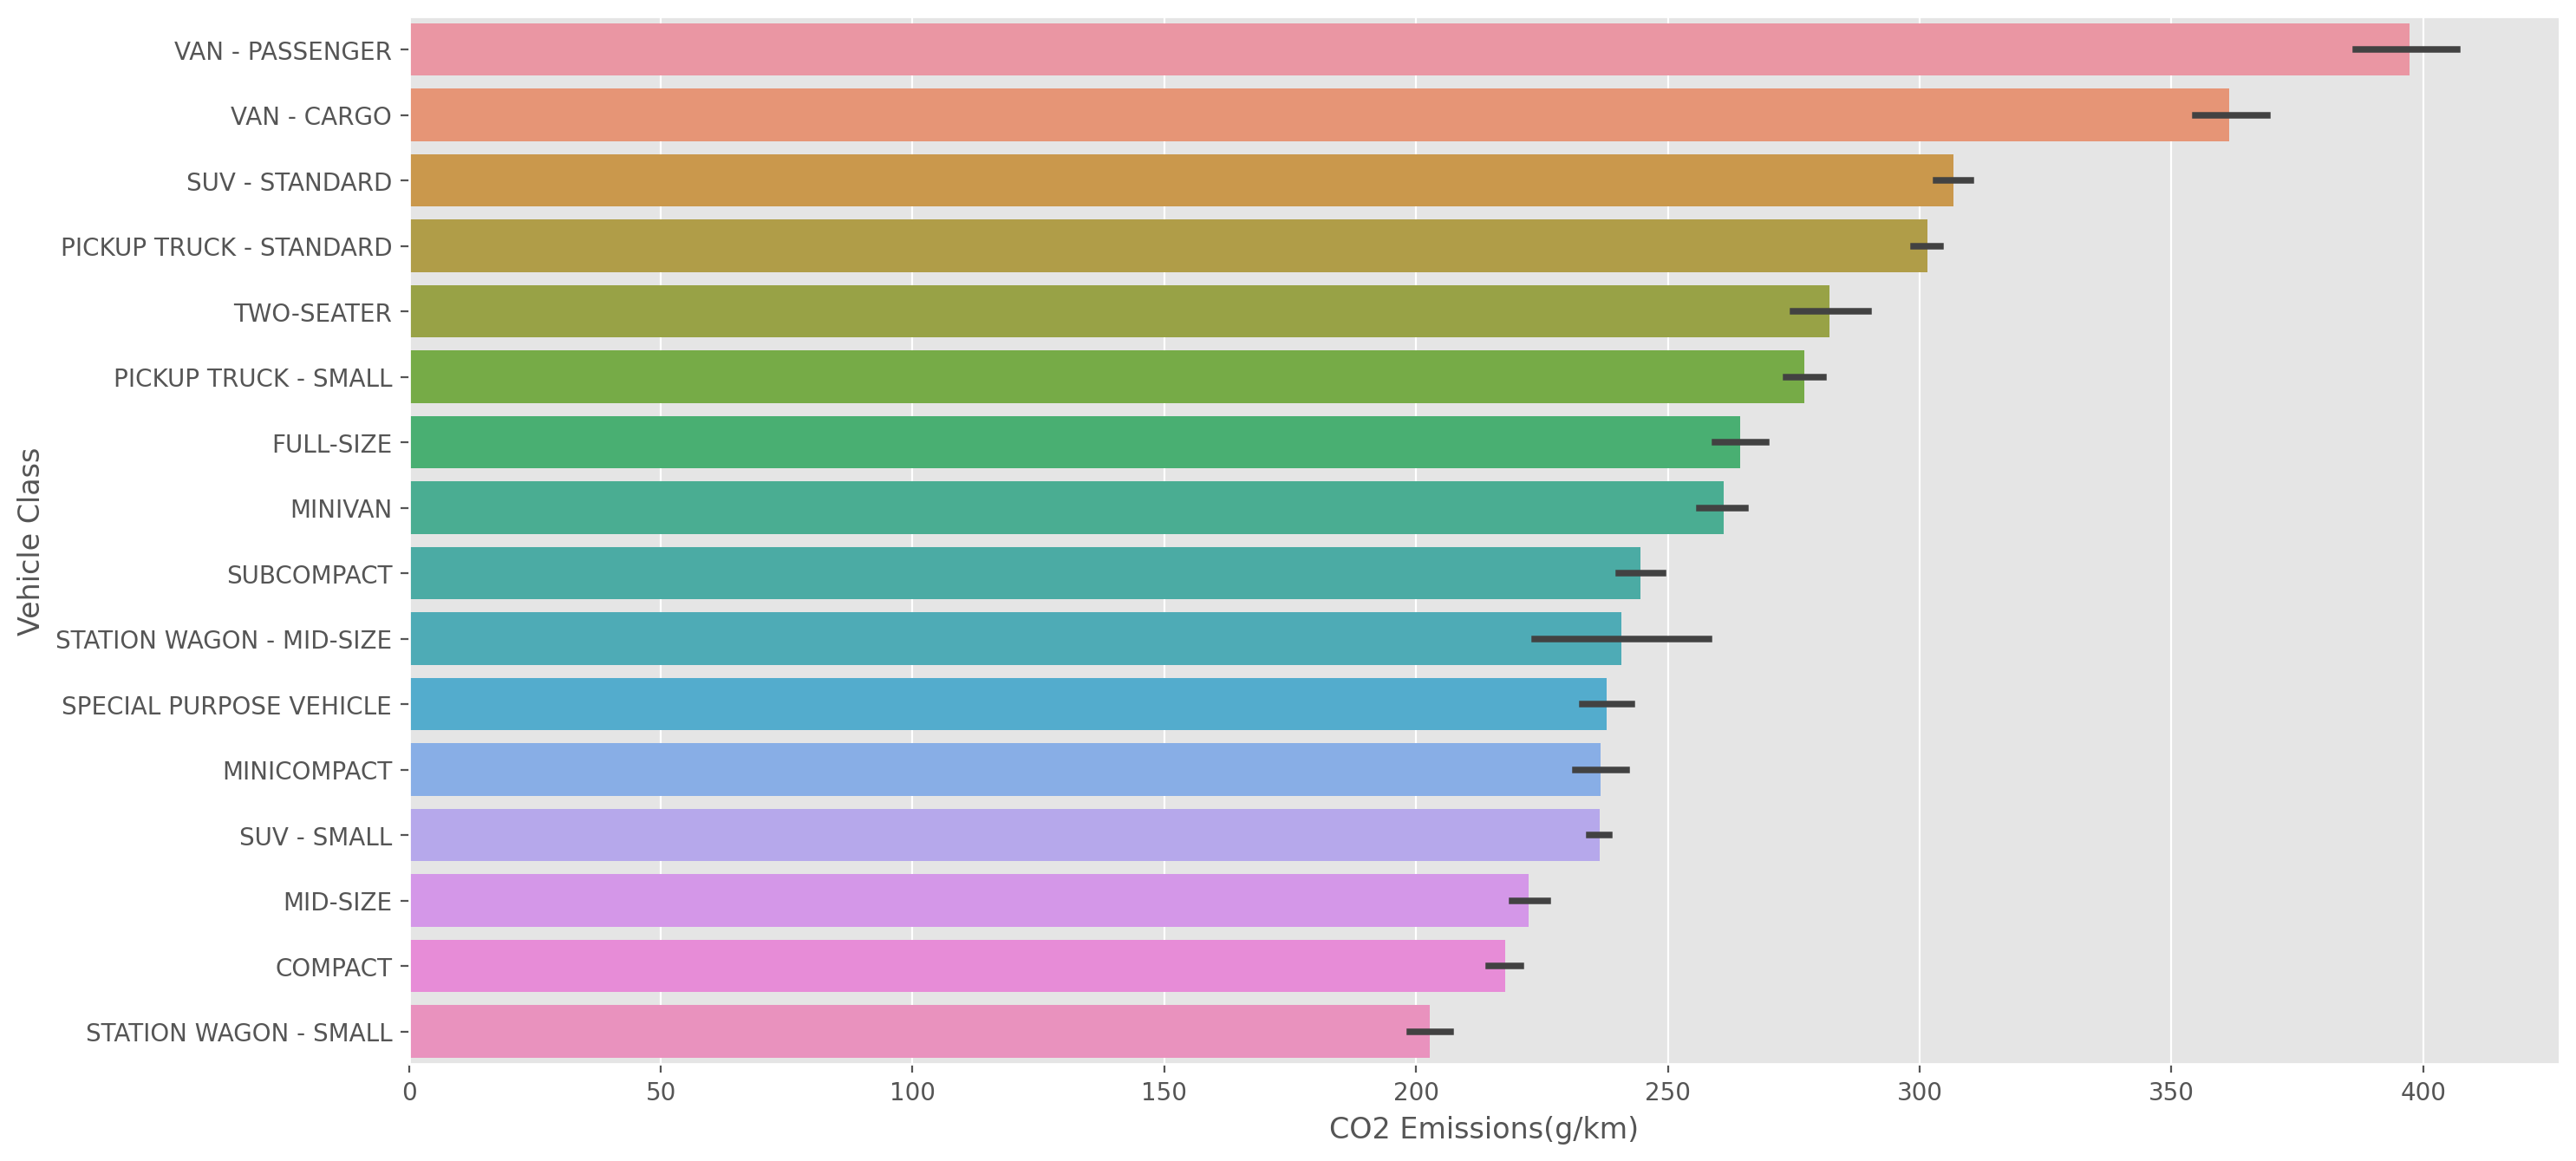

In [15]:
# Vehicle Class and emission
desc_order = data.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean().sort_values(ascending = False).index
plt.figure(figsize = (16,8), dpi = 200)
sns.barplot('CO2 Emissions(g/km)', 'Vehicle Class',  data = data, order = desc_order)

<AxesSubplot:>

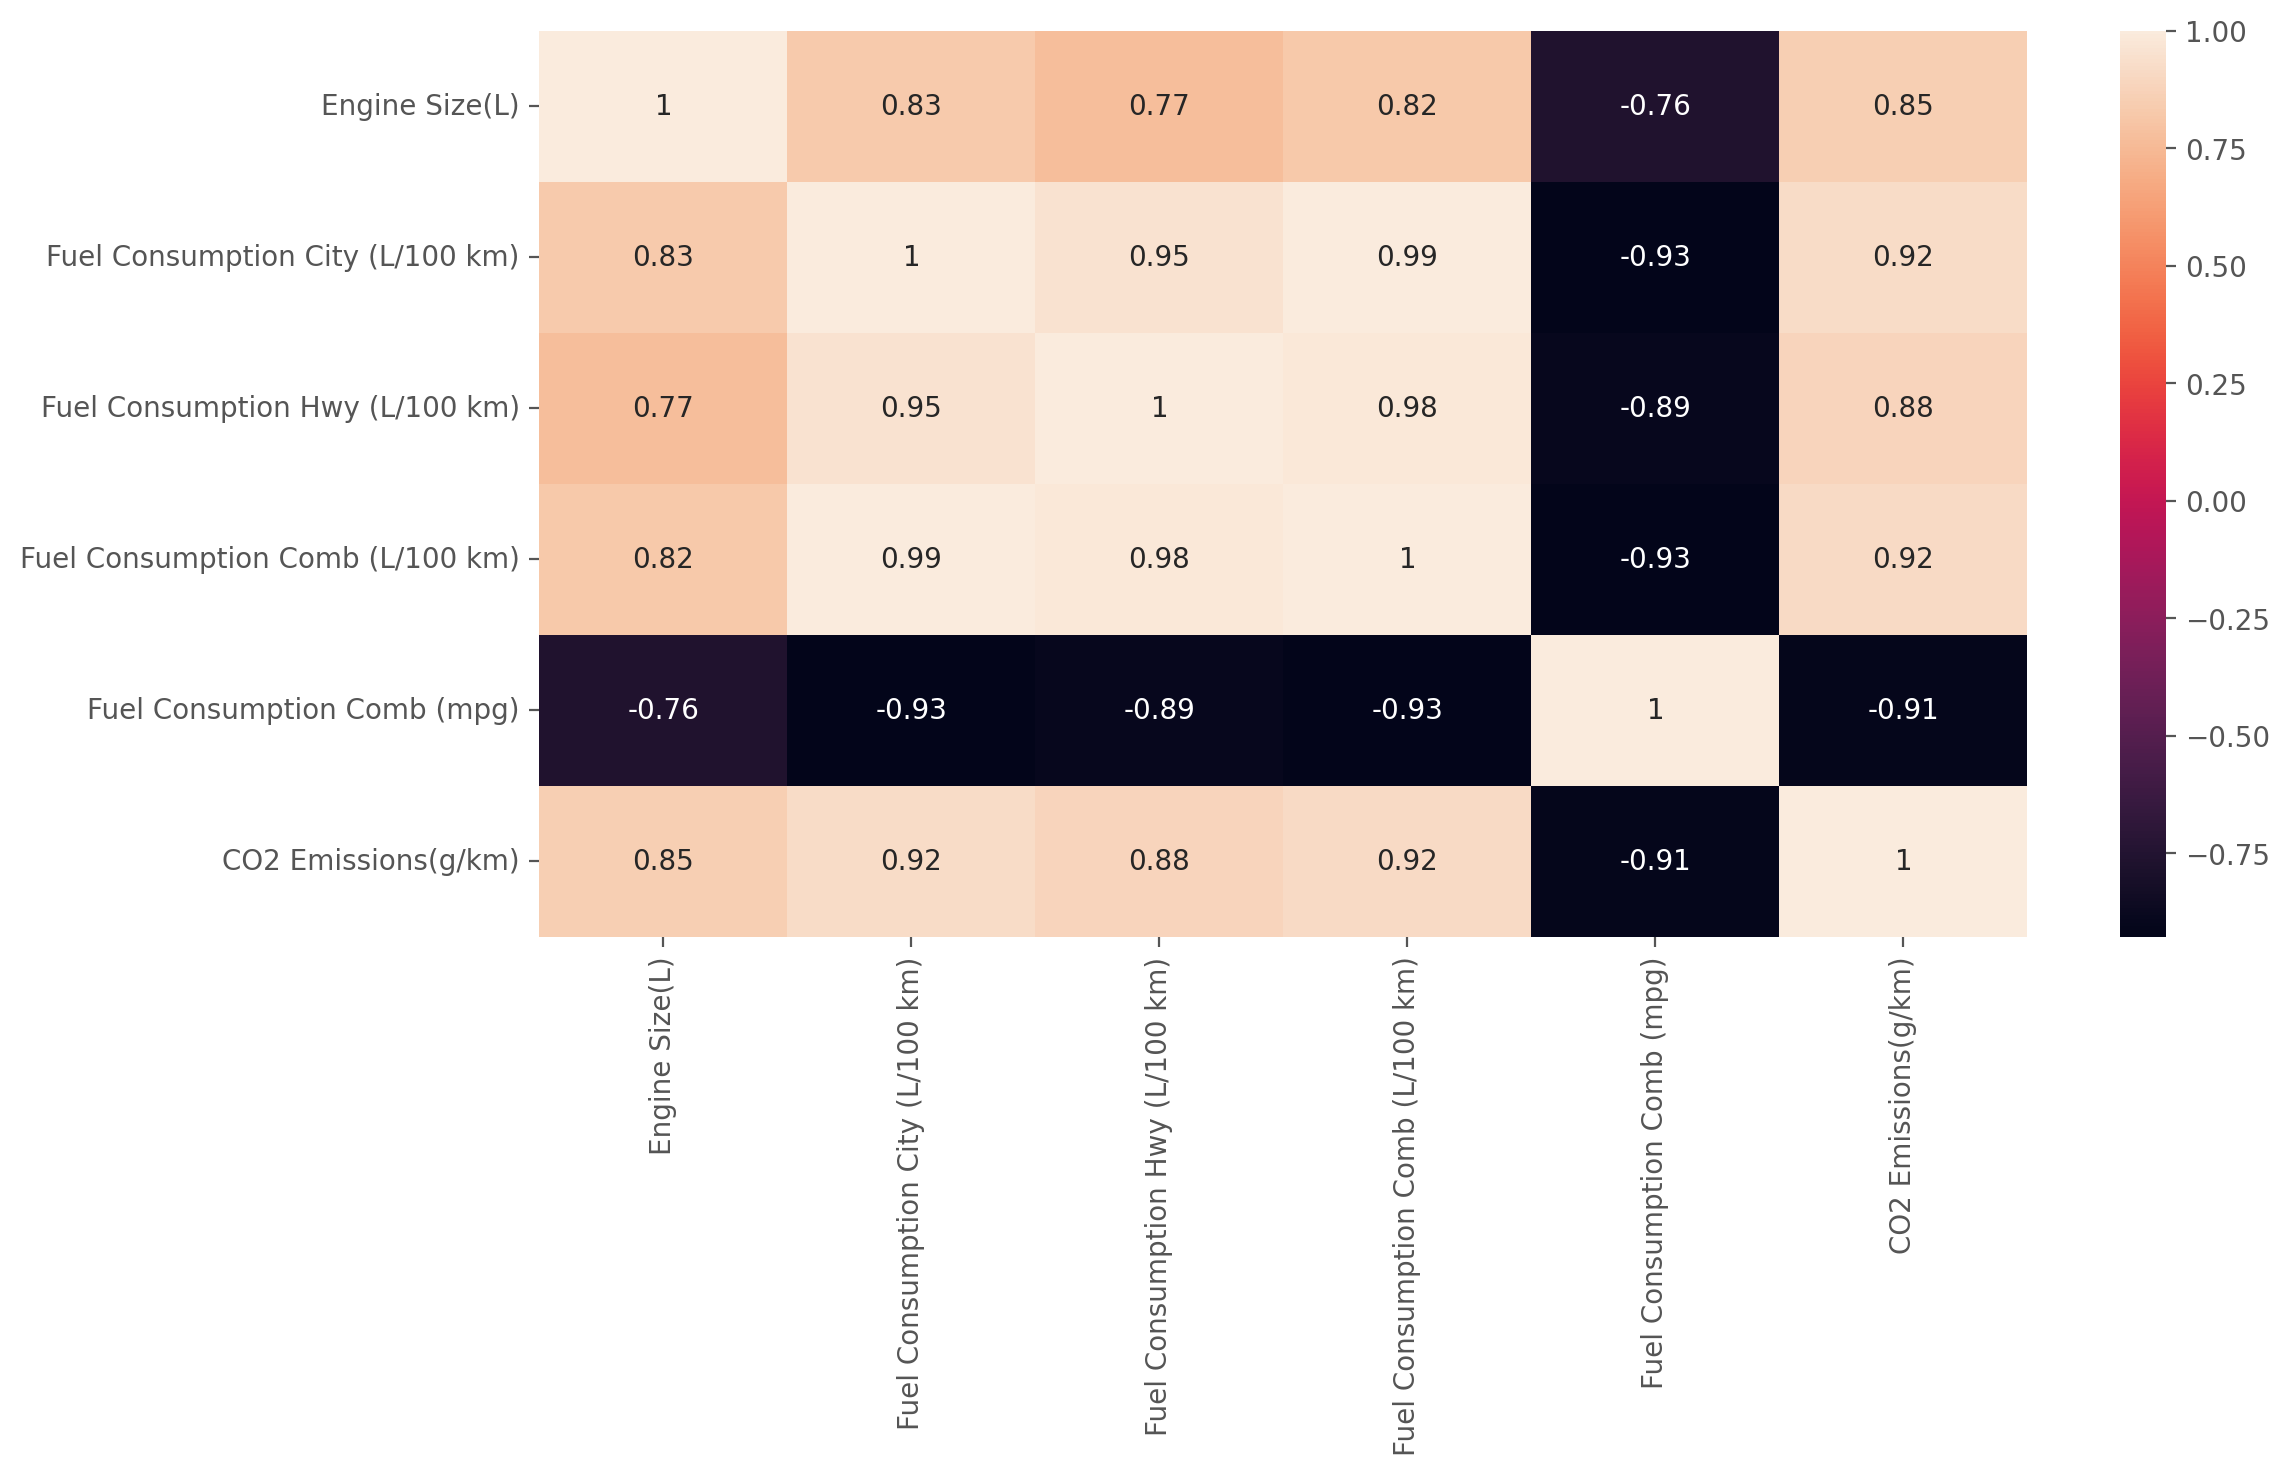

In [16]:
# Checking Correlation  (Multicollinearity)
cols = ['Engine Size(L)', 'Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)','CO2 Emissions(g/km)']
plt.figure(figsize = (12,6), dpi = 200)
sns.heatmap(data[cols].corr(), annot = True)

----
----

In [17]:
cols = ['Vehicle Class', 'Fuel Type', 'Transmission', 'Cylinders', 'Engine Size(L)', 'Fuel Consumption Comb (L/100 km)']
X = data[cols]
Y = data[['CO2 Emissions(g/km)']]

In [18]:
# Independent feature Set
X.head(10)

,Vehicle Class,Fuel Type,Transmission,Cylinders,Engine Size(L),Fuel Consumption Comb (L/100 km)
0,COMPACT,Z,AS5,4,2.0,8.5
1,COMPACT,Z,M6,4,2.4,9.6
2,COMPACT,Z,AV7,4,1.5,5.9
3,SUV - SMALL,Z,AS6,6,3.5,11.1
4,SUV - SMALL,Z,AS6,6,3.5,10.6
5,MID-SIZE,Z,AS6,6,3.5,10.0
6,MID-SIZE,Z,AS6,6,3.5,10.1
7,MID-SIZE,Z,AS6,6,3.7,11.1
8,MID-SIZE,Z,M6,6,3.7,11.6
9,COMPACT,Z,AS5,4,2.4,9.2


In [19]:
# Dependent Feature
Y.head(10)

,CO2 Emissions(g/km)
0,196
1,221
2,136
3,255
4,244
5,230
6,232
7,255
8,267
9,212


In [20]:
print('Independent Feature Set Shape : ', X.shape)
print('Dependent Feature Shape       : ', Y.shape)

Independent Feature Set Shape :  (6282, 6)
Dependent Feature Shape       :  (6282, 1)


In [21]:
# Splitting Data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [22]:
print('Training data shape   : ', x_train.shape)
print('Training labels shape : ', y_train.shape)
print('Testing data shape    : ', x_test.shape)
print('Testing labels shape  : ', y_test.shape)

Training data shape   :  (5025, 6)
Training labels shape :  (5025, 1)
Testing data shape    :  (1257, 6)
Testing labels shape  :  (1257, 1)


In [23]:
# Scaling  (Data Leakage)
cols = ['Engine Size(L)','Fuel Consumption Comb (L/100 km)']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fitting the object on training set
scaler.fit(x_train[cols])

# Transforming the training and testing sets
x_train[cols] = scaler.transform(x_train[cols])
x_test[cols]  = scaler.transform(x_test[cols])

In [24]:
# Encoding
cols = ['Vehicle Class', 'Fuel Type', 'Transmission']
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

# Fit on the training set
encoder.fit(x_train[cols])

# Transforming training and test sets
x_train[cols] = encoder.transform(x_train[cols])
x_test[cols] = encoder.transform(x_test[cols])

In [25]:
x_train.head()

,Vehicle Class,Fuel Type,Transmission,Cylinders,Engine Size(L),Fuel Consumption Comb (L/100 km)
5583,11.0,3.0,3.0,4,0.213333,0.270642
749,10.0,4.0,16.0,6,0.346667,0.279817
7125,2.0,4.0,17.0,6,0.280000,0.389908
7335,0.0,3.0,19.0,4,0.120000,0.018349
5942,1.0,3.0,15.0,4,0.200000,0.192661


In [26]:
x_test.head()

,Vehicle Class,Fuel Type,Transmission,Cylinders,Engine Size(L),Fuel Consumption Comb (L/100 km)
3000,10.0,4.0,16.0,8,0.506667,0.348624
6477,9.0,3.0,25.0,4,0.120000,0.252294
4078,10.0,4.0,16.0,6,0.280000,0.279817
3407,0.0,4.0,17.0,6,0.280000,0.298165
2417,0.0,3.0,25.0,4,0.066667,0.137615


---
# ================================================

## RandomForestRegressor

In [29]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, max_depth = 6, criterion = 'squared_error')
regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=6)

In [30]:
pred_train = regressor.predict(x_train)
pred_test  = regressor.predict(x_test)

print('Training Set Score : ', r2_score(y_train, pred_train))
print('Testing Set Score  : ', r2_score(y_test, pred_test))

Training Set Score :  0.9970264662267927
Testing Set Score  :  0.99618726911593


## XGBRegressor

In [32]:
from xgboost import XGBRegressor
regressor = XGBRegressor(n_estimators = 50, max_depth = 5)
regressor.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [33]:
pred_train = regressor.predict(x_train)
pred_test  = regressor.predict(x_test)

print('Training Set Score : ', r2_score(y_train, pred_train))
print('Testing Set Score  : ', r2_score(y_test, pred_test))

Training Set Score :  0.9982466705990375
Testing Set Score  :  0.9969727267224887


## LGBMRegressor

In [34]:
from lightgbm import LGBMRegressor
regressor = LGBMRegressor(n_estimators = 50)
regressor.fit(x_train, y_train)

LGBMRegressor(n_estimators=50)

In [35]:
pred_train = regressor.predict(x_train)
pred_test  = regressor.predict(x_test)

print('Training Set Score : ', r2_score(y_train, pred_train))
print('Testing Set Score  : ', r2_score(y_test, pred_test))

Training Set Score :  0.9956029807710874
Testing Set Score  :  0.9939530302802347


## AdaBoostRegressor

In [36]:
from sklearn.tree import DecisionTreeRegressor
estimator = DecisionTreeRegressor(max_depth = 5, criterion = 'squared_error')

from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor(estimator, n_estimators = 50)
regressor.fit(x_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5))